In [ ]:
#importando bibliotecas necessárias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#leitura do dado e criação do dataframe
data = pd.read_csv('qualidade_do_ar.csv')

In [ ]:
data.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
3,10/03/2004,21.00.00,1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
4,10/03/2004,22.00.00,1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           9357 non-null   object
 1   Time           9357 non-null   object
 2   PT08.S1(CO)    9357 non-null   int64 
 3   NMHC(GT)       9357 non-null   int64 
 4   C6H6(GT)       9357 non-null   object
 5   PT08.S2(NMHC)  9357 non-null   int64 
 6   NOx(GT)        9357 non-null   int64 
 7   PT08.S3(NOx)   9357 non-null   int64 
 8   NO2(GT)        9357 non-null   int64 
 9   PT08.S4(NO2)   9357 non-null   int64 
 10  PT08.S5(O3)    9357 non-null   int64 
 11  T              9357 non-null   object
 12  RH             9357 non-null   object
 13  AH             9357 non-null   object
dtypes: int64(8), object(6)
memory usage: 1023.5+ KB


In [ ]:
data.isnull().any()

Date             False
Time             False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
data.isnull().sum()

Date             0
Time             0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.set_index("Date", inplace=True)
data.index = pd.to_datetime(data.index)
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
data['Time'] = pd.to_datetime(data['Time'],format= '%H.%M.%S').dt.hour
type(data['Time'][0])

numpy.int64

In [ ]:
data.head()

,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-10-03,18,1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
2004-10-03,19,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2004-10-03,20,1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
2004-10-03,21,1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
2004-10-03,22,1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-10-03 to 2005-04-04
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           9357 non-null   int64 
 1   PT08.S1(CO)    9357 non-null   int64 
 2   NMHC(GT)       9357 non-null   int64 
 3   C6H6(GT)       9357 non-null   object
 4   PT08.S2(NMHC)  9357 non-null   int64 
 5   NOx(GT)        9357 non-null   int64 
 6   PT08.S3(NOx)   9357 non-null   int64 
 7   NO2(GT)        9357 non-null   int64 
 8   PT08.S4(NO2)   9357 non-null   int64 
 9   PT08.S5(O3)    9357 non-null   int64 
 10  T              9357 non-null   object
 11  RH             9357 non-null   object
 12  AH             9357 non-null   object
dtypes: int64(9), object(4)
memory usage: 1023.4+ KB


In [ ]:
data.describe() # estatística básica do dado 

,Time,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,6.923182,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,0.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,5.000000,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,11.000000,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,18.000000,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,23.000000,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [ ]:
data.apply(lambda x : x == -200).sum() # retirada dos outliers

Time                0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)            0
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                   0
RH                  0
AH                  0
dtype: int64

In [ ]:
data.replace(to_replace= -200, value= np.NaN, inplace= True) # substituição dos valores inválidos(-200) por NaN

In [ ]:
data.fillna(method='ffill', inplace= True)

In [ ]:
data.isnull().any()

Time             False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
data.info() # informação do tipo de dados que possímos no dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-10-03 to 2005-04-04
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   int64  
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   object 
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   object 
 10  RH             9357 non-null   object 
 11  AH             9357 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 950.3+ KB


In [ ]:
data.describe() # estaística básica 

,Time,PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,1099.748224,942.548253,240.731217,832.742225,109.414877,1453.014535,1030.511916
std,6.923182,215.205784,269.581368,206.618453,255.709423,47.221662,347.434084,410.916759
min,0.000000,647.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000
25%,5.000000,939.000000,733.000000,97.000000,655.000000,73.000000,1228.000000,726.000000
50%,11.000000,1065.000000,911.000000,174.000000,807.000000,102.000000,1460.000000,964.000000
75%,18.000000,1226.647059,1117.000000,318.000000,968.000000,137.000000,1677.000000,1287.000000
max,23.000000,2040.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


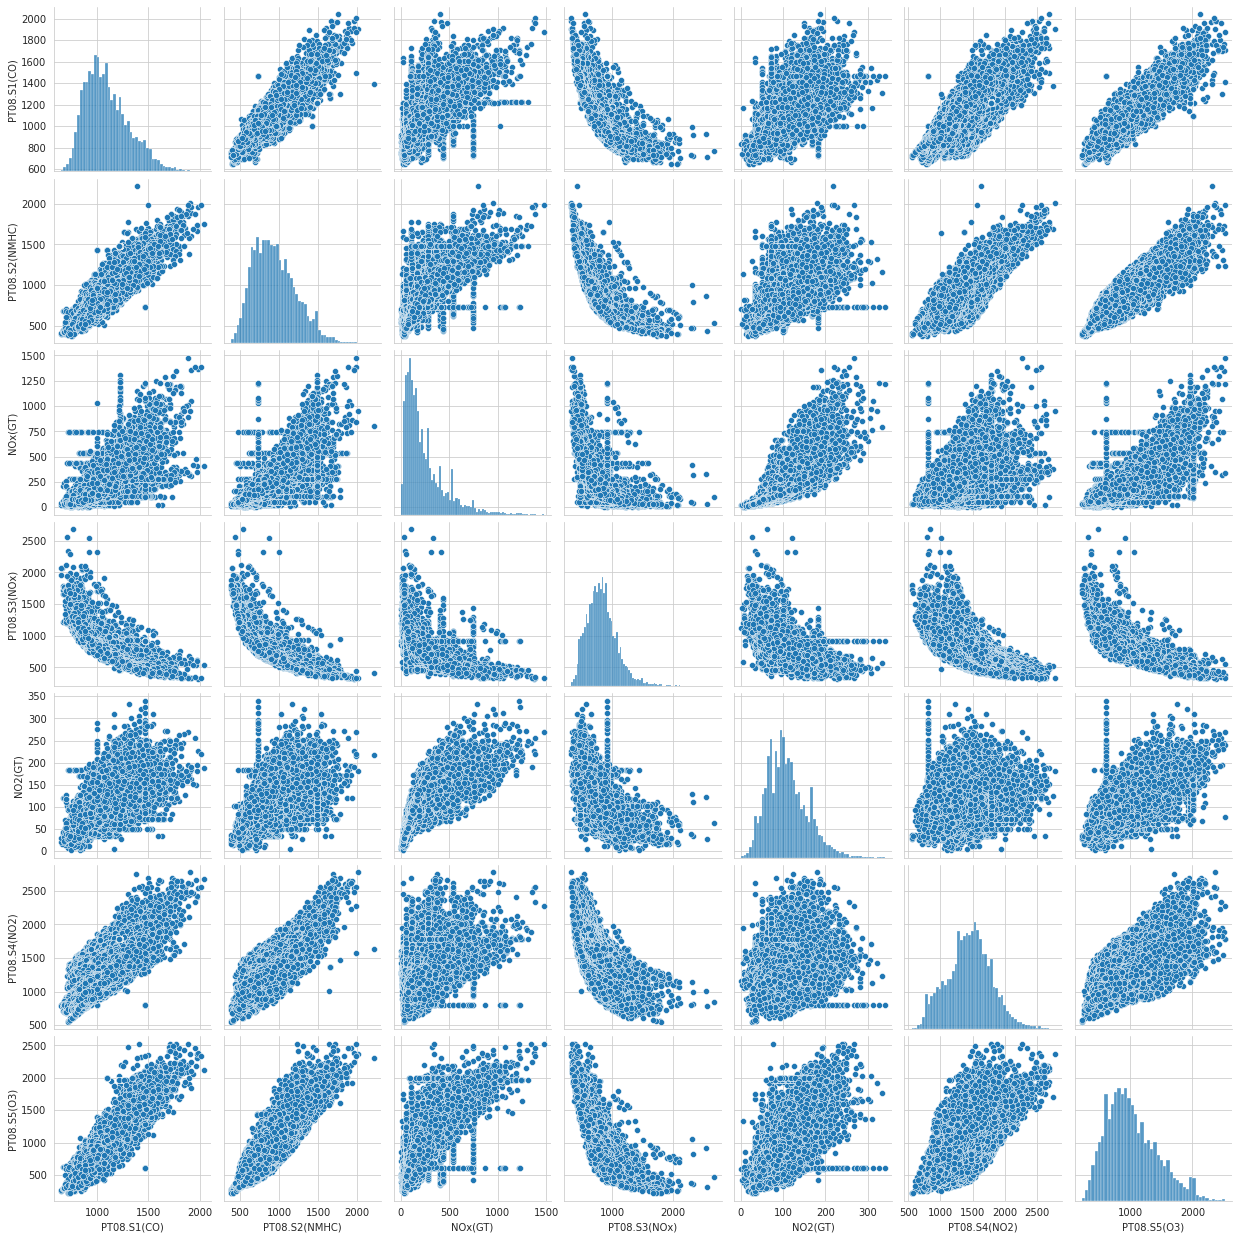

In [ ]:
sns.set_style('whitegrid')
eda_data = data.drop(['Time','RH','AH','T'], axis=1)
sns.pairplot(eda_data)

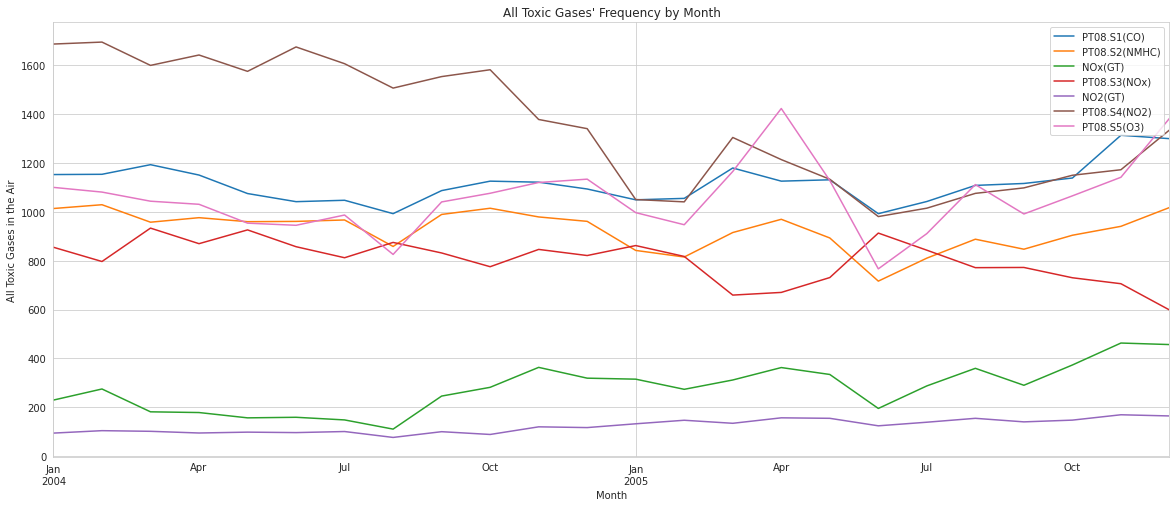

In [ ]:
# pico de todos os gases toxícos por mês para os dados em análise 
#vemos um pico de emisissão de monóxido de carbono e e a e o gráfico de poluentes ao longo ano nos permite ver que há um crescimento no início 
#do ano da emissão dos poluentes que volta a crescer por volta de  outubro a dezembro.
#melhor explicado nos notebooks onde se usa a biblioteca fbprohet

data.drop(['Time','RH','AH','T'], axis=1).resample('M').mean().plot(figsize = (20,8))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('All Toxic Gases in the Air')
plt.title("All Toxic Gases' Frequency by Month");

In [ ]:
data.columns

Index(['Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

Text(0.5, 1.0, 'Mean Total Carbon Monoxides (CO) Level by Month')

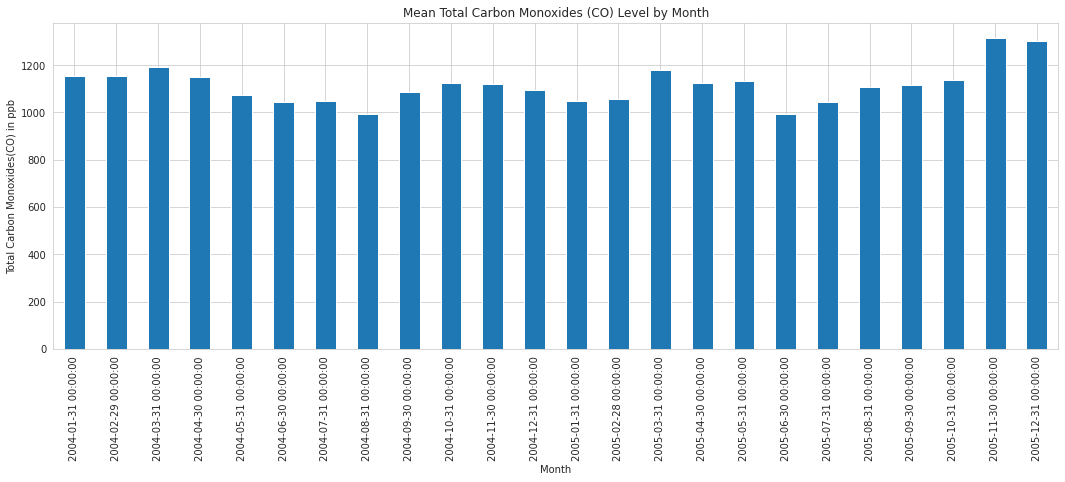

In [ ]:
# emissão diária do monóxido de carbono por dia 
# usando o fbprophet teremos uma relação com o dia da semana que apresenta um pico de emissão que é na quarta feira
data['PT08.S1(CO)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Carbon Monoxides(CO) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Carbon Monoxides (CO) Level by Month")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NOx) Level by Month')

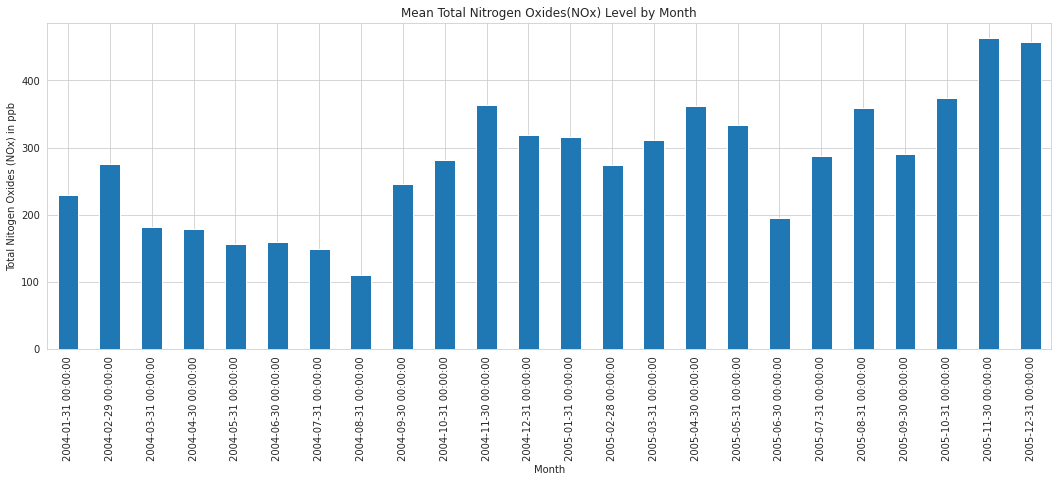

In [ ]:
data['NOx(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitogen Oxides (NOx) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NOx) Level by Month")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NO2) Level by Month')

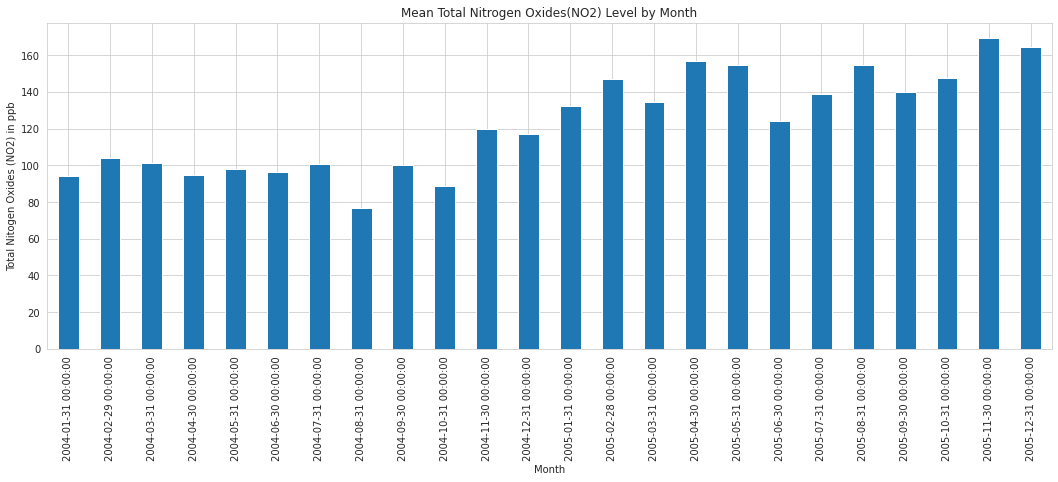

In [ ]:
data['NO2(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitogen Oxides (NO2) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NO2) Level by Month")

Text(0.5, 1.0, 'Mean Total Ozone(O3) Level by Month')

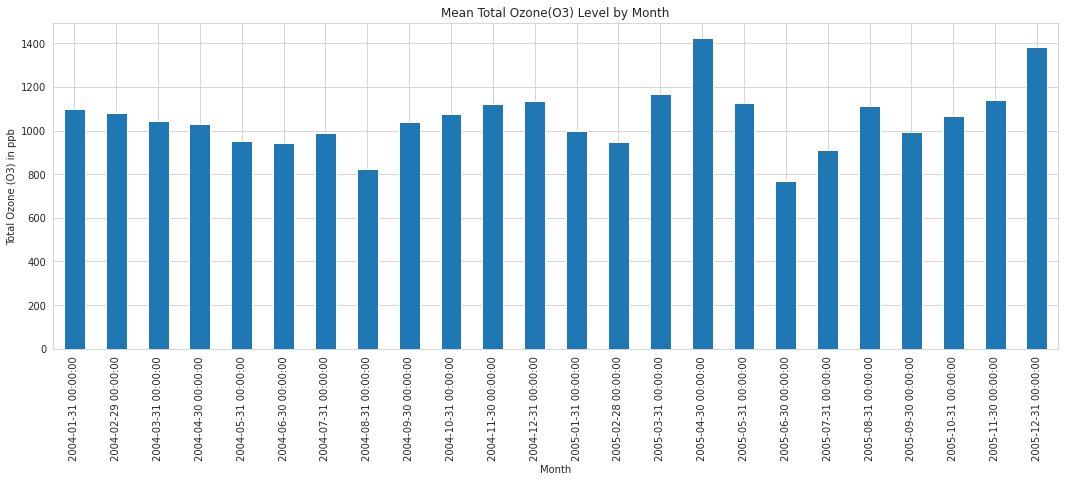

In [ ]:
data['PT08.S5(O3)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Ozone (O3) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Ozone(O3) Level by Month")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Frequency During Days')

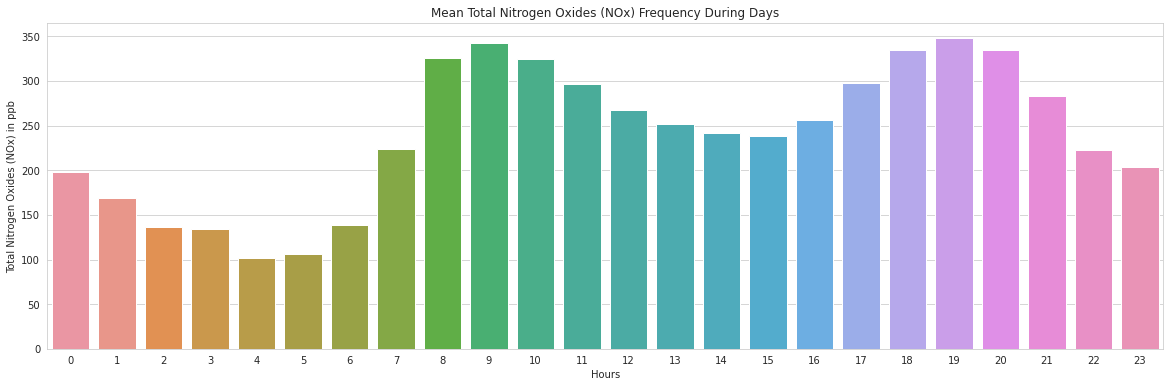

In [ ]:
#emissão dos poluentes por hora 
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NOx(GT)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")

Text(0.5, 1.0, 'Mean Total Carbon Monoxides (CO) Frequency During Days')

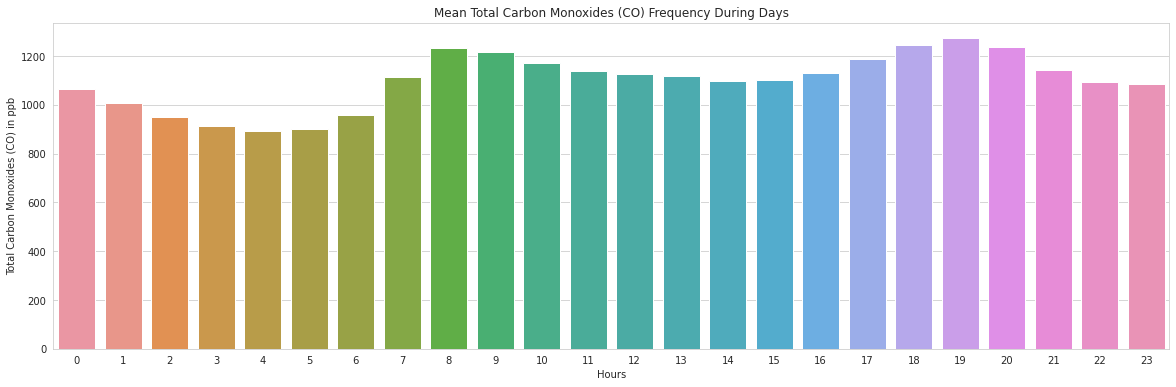

In [ ]:
#O pico de maior emissão de monóxido de carbono  foi de 8 a 10 da manhã  e 17 às 20 horas
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='PT08.S1(CO)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Carbon Monoxides (CO) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Carbon Monoxides (CO) Frequency During Days")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NO2) Frequency During Days')

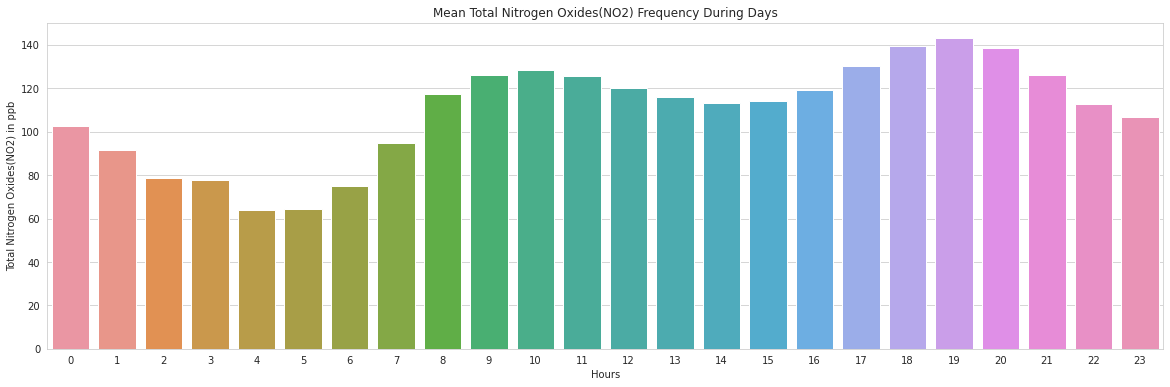

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NO2(GT)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides(NO2) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NO2) Frequency During Days")

Text(0.5, 1.0, 'Mean Total Ozone(O3) Frequency During Days')

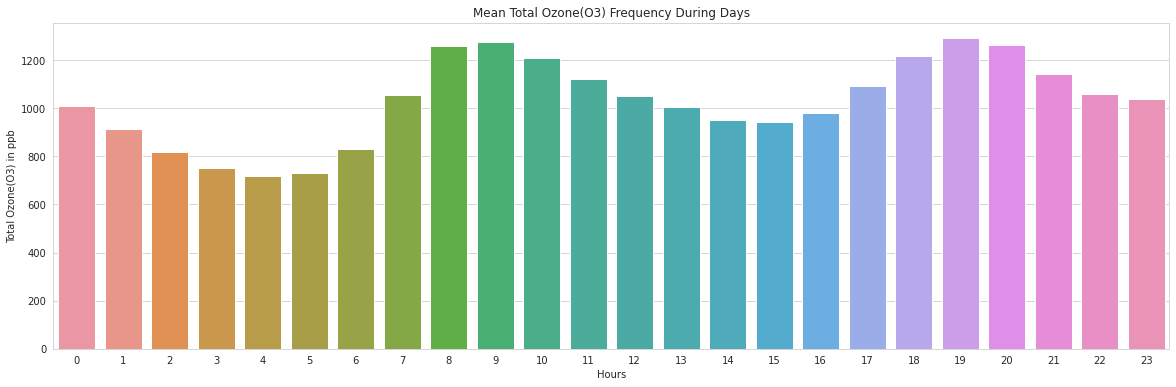

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='PT08.S5(O3)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Ozone(O3) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Ozone(O3) Frequency During Days")

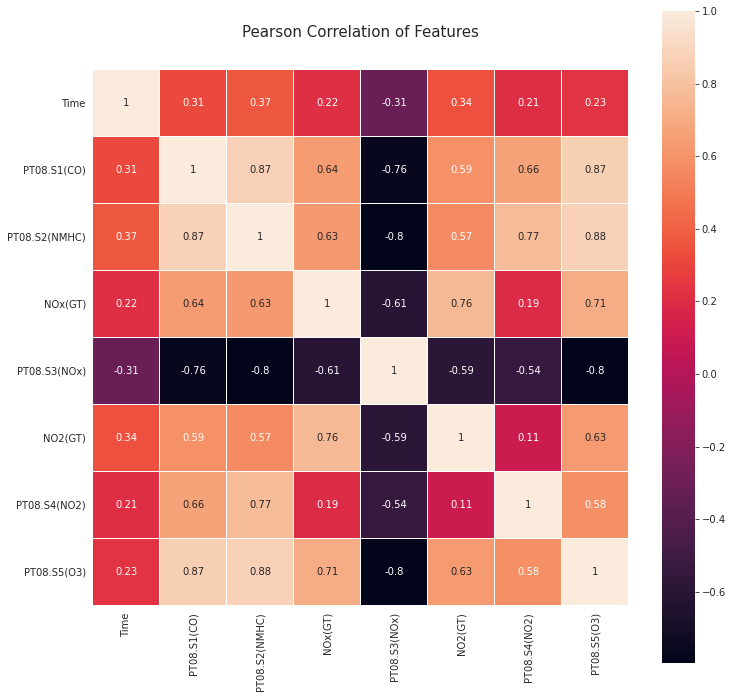

In [ ]:
#As variáveis mais mais relacionadas a variável de predição são PT08.S2(NMHC)e PT08.S3(NOx) e PT08.S4(N02) e PT08.S5(03)
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white',annot=True)

In [ ]:
#Algoritmos de machine learning para predição de PT08.S1(CO) (mónico de carbono)
X = data.drop(['PT08.S1(CO)','T','Time','RH','AH','C6H6(GT)'], axis=1)

y= data['PT08.S1(CO)']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#Regressão Linear 
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)

-50.159845686669456


In [ ]:
coeff_data = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
PT08.S2(NMHC),0.173651
NOx(GT),0.056211
PT08.S3(NOx),-0.051929
NO2(GT),0.582322
PT08.S4(NO2),0.133481
PT08.S5(O3),0.198599


In [ ]:
prediction = lm.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Predicted vs Actual')

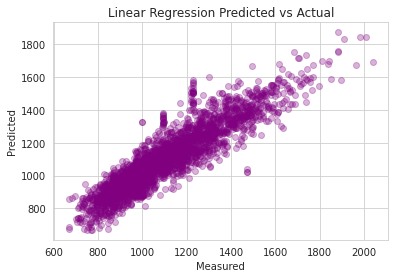

In [ ]:
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')

In [ ]:
linear_regression_score = lm.score(X_test, y_test)
linear_regression_score

0.8306607568449444

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


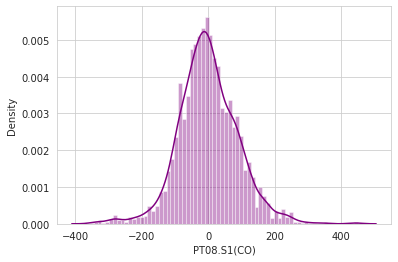

In [ ]:
sns.distplot((y_test-prediction), bins=70, color="purple")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


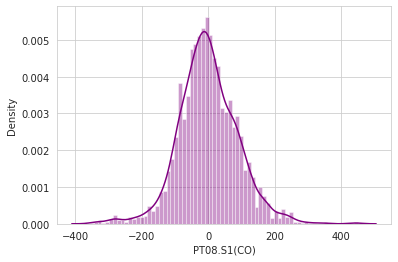

In [ ]:
sns.distplot((y_test-prediction), bins=70, color="purple")

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 67.33363585195735
MSE: 7934.788834630486
RMSE: 89.07743167958137


In [ ]:
coeff_data

,Coefficient
PT08.S2(NMHC),0.173651
NOx(GT),0.056211
PT08.S3(NOx),-0.051929
NO2(GT),0.582322
PT08.S4(NO2),0.133481
PT08.S5(O3),0.198599


In [ ]:
#lasso
from sklearn.linear_model import Lasso

In [ ]:
l = Lasso()

In [ ]:
l.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print(l.intercept_)

503.6157139722702


In [ ]:
coeff_data = pd.DataFrame(l.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
PT08.S2(NMHC),0.173781
NOx(GT),0.056284
PT08.S3(NOx),-0.051947
NO2(GT),0.581115
PT08.S4(NO2),0.133384
PT08.S5(O3),0.198619


In [ ]:
prediction = l.predict(X_test)

Text(0.5, 1.0, 'Lasso Regression Predicted vs Actual')

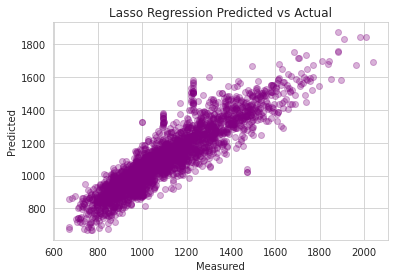

In [ ]:
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Regression Predicted vs Actual')

In [ ]:
lasso_regression_score = l.score(X_test, y_test)
lasso_regression_score

0.8306625212921975

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


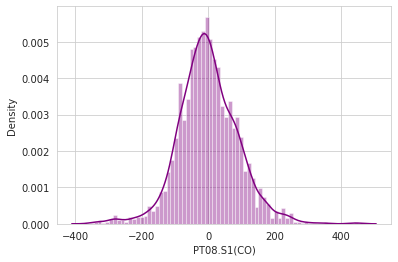

In [ ]:
sns.distplot((y_test-prediction), bins=70, color="purple")

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 67.33109472115228
MSE: 7934.706157301226
RMSE: 89.07696760274918


In [ ]:
coeff_data

,Coefficient
PT08.S2(NMHC),0.173781
NOx(GT),0.056284
PT08.S3(NOx),-0.051947
NO2(GT),0.581115
PT08.S4(NO2),0.133384
PT08.S5(O3),0.198619


In [ ]:
#Regressão Ridge 
from sklearn.linear_model import Ridge

In [ ]:
r = Ridge()

In [ ]:
r.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print(r.intercept_)

503.4878066347985


In [ ]:
coeff_data = pd.DataFrame(r.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
PT08.S2(NMHC),0.173651
NOx(GT),0.056211
PT08.S3(NOx),-0.051929
NO2(GT),0.582322
PT08.S4(NO2),0.133481
PT08.S5(O3),0.198599


In [ ]:
prediction = r.predict(X_test)

Text(0.5, 1.0, 'Ridge Regression Predicted vs Actual')

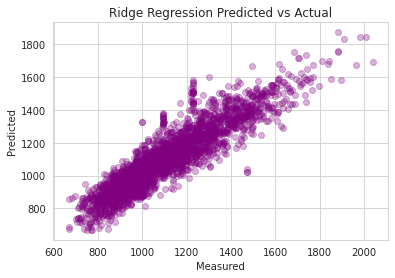

In [ ]:
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predicted vs Actual')

In [ ]:
linear_regression_score = r.score(X_test, y_test)
linear_regression_score

0.8306607570692583

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


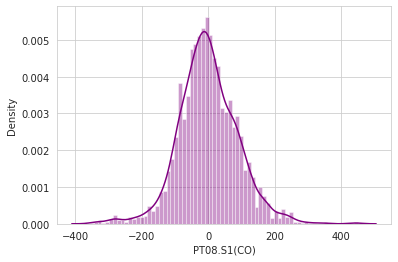

In [ ]:
sns.distplot((y_test-prediction), bins=70, color="purple")

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 67.33363557878411
MSE: 7934.78882411973
RMSE: 89.0774316205835


In [ ]:
coeff_data

,Coefficient
PT08.S2(NMHC),0.173651
NOx(GT),0.056211
PT08.S3(NOx),-0.051929
NO2(GT),0.582322
PT08.S4(NO2),0.133481
PT08.S5(O3),0.198599


In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
e = ElasticNet()

In [ ]:
e.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print(e.intercept_)

503.5998432487404


In [ ]:
coeff_data = pd.DataFrame(e.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
PT08.S2(NMHC),0.173760
NOx(GT),0.056287
PT08.S3(NOx),-0.051950
NO2(GT),0.581309
PT08.S4(NO2),0.133403
PT08.S5(O3),0.198608


In [ ]:
prediction = e.predict(X_test)

Text(0.5, 1.0, 'ElasticNet Regression Predicted vs Actual')

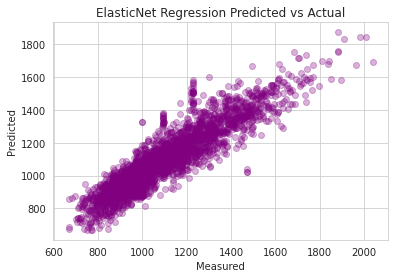

In [ ]:
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('ElasticNet Regression Predicted vs Actual')

In [ ]:
elasticnet_regression_score = e.score(X_test, y_test)
elasticnet_regression_score

0.8306623409127248

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


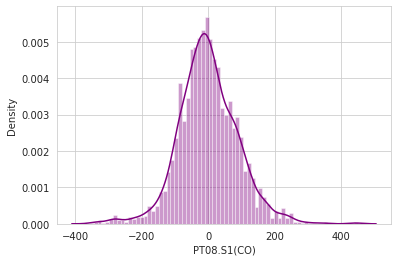

In [ ]:
sns.distplot((y_test-prediction), bins=70, color="purple")

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 67.33144763839071
MSE: 7934.714609406003
RMSE: 89.07701504544258


In [ ]:
coeff_data

,Coefficient
PT08.S2(NMHC),0.173760
NOx(GT),0.056287
PT08.S3(NOx),-0.051950
NO2(GT),0.581309
PT08.S4(NO2),0.133403
PT08.S5(O3),0.198608


In [ ]:
eda = data.groupby('Time')
eda['Time'].sum()

Time
0        0
1      390
2      780
3     1170
4     1560
5     1950
6     2340
7     2730
8     3120
9     3510
10    3900
11    4290
12    4680
13    5070
14    5460
15    5835
16    6224
17    6613
18    7020
19    7410
20    7800
21    8190
22    8580
23    8970
Name: Time, dtype: int64

In [ ]:
lt = eda["PT08.S5(O3)"].sum()

In [ ]:
for i in range(len(lt)):
    print(lt[i], end = " : ")

393091.0 : 356208.0 : 318975.0 : 293059.0 : 280506.0 : 285465.0 : 323222.0 : 411228.0 : 491504.0 : 497808.0 : 471504.0 : 437285.0 : 410123.0 : 392717.0 : 370887.0 : 367229.0 : 381427.0 : 425271.0 : 473954.0 : 503429.0 : 492954.0 : 445832.0 : 413760.0 : 405062.0 : 

In [ ]:
eda = data.groupby('Time')
tab = eda.sum()

In [ ]:
tab.head()

,PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
Time,,,,,,,
0,415995.630662,341483.0,77057.0,329425.0,40000.0,541058.0,393091.0
1,392858.674141,313707.0,65909.0,353874.0,35692.0,519163.0,356208.0
2,370542.810504,283636.0,53128.0,387255.0,30646.0,499078.0,318975.0
3,355558.762885,262268.0,52333.0,416944.0,30261.0,485370.0,293059.0
4,348230.112885,251525.0,39715.0,432143.0,24886.0,478616.0,280506.0


In [ ]:
tab.max()

In [ ]:
tab.iloc[i, :]

PT08.S1(CO)      423530.083457
PT08.S2(NMHC)    353225.000000
NOx(GT)           79579.000000
PT08.S3(NOx)     320873.000000
NO2(GT)           41582.000000
PT08.S4(NO2)     550710.000000
PT08.S5(O3)      405062.000000
Name: 23, dtype: float64

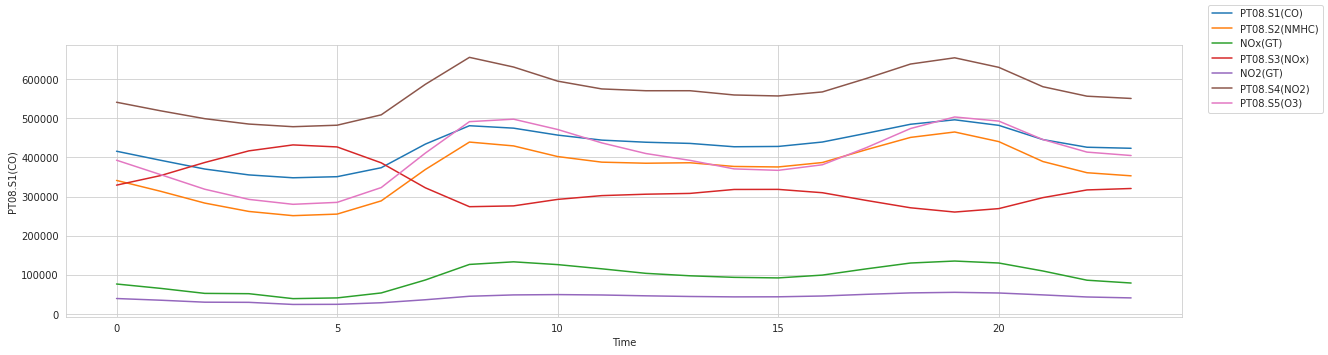

In [ ]:
#pico de gases tóxicos por hora 
#O pico de maior emissão de gases poluentes foi de 8 a 10 da manhã  e 17 às 20 horas
fig = plt.figure(figsize = (20, 5))

sns.lineplot(x = tab.index, y = tab["PT08.S1(CO)"])
sns.lineplot(x = tab.index, y = tab["PT08.S2(NMHC)"])
sns.lineplot(x = tab.index, y = tab["NOx(GT)"])
sns.lineplot(x = tab.index, y = tab["PT08.S3(NOx)"])
sns.lineplot(x = tab.index, y = tab["NO2(GT)"])
sns.lineplot(x = tab.index, y = tab["PT08.S4(NO2)"])
sns.lineplot(x = tab.index, y = tab["PT08.S5(O3)"])
fig.legend(tab)
fig.show()

In [ ]:

df = pd.read_csv("qualidade_do_ar.csv")
df.shape


(9357, 14)

In [ ]:
df[df['T'] != -200].shape # retirada dos valores inválidos 

(9357, 14)

In [ ]:
df[df['T'] != -200].head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
3,10/03/2004,21.00.00,1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
4,10/03/2004,22.00.00,1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"


In [ ]:
df_new = df[df['T'] != -200]

In [ ]:
df_new.head()
df_new.shape

(9357, 14)

In [ ]:
df_new.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
3,10/03/2004,21.00.00,1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
4,10/03/2004,22.00.00,1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"


In [ ]:
scaler = StandardScaler()  #scale dos dados 

In [ ]:
df_new.drop(["Date", "Time"], axis=1, inplace=True)

In [ ]:
df_new_frame = pd.DataFrame(df_new)

In [ ]:
df_new_frame.head()

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
3,1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
4,1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"


In [ ]:
#com a extração de tempo e data 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
model = LinearRegression()

In [ ]:
x = df_new_frame.drop(["PT08.S1(CO)","T","C6H6(GT)","RH", "AH"], axis = 1)
y = df_new_frame["PT08.S1(CO)"]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict = model.predict(xtest)

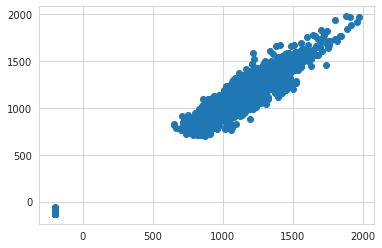

In [ ]:
plt.scatter(ytest, predict)
plt.show()

In [ ]:
print("metrics.mean_absolute_error : ", metrics.mean_absolute_error(ytest, predict))
print("metrics.mean_squared_error : ", metrics.mean_squared_error(ytest, predict))
print("np.sqrt(metrics.mean_squared_error : ", np.sqrt(metrics.mean_squared_error(ytest, predict)))
print("metrics.r2_score : ", metrics.r2_score(ytest, predict))

metrics.mean_absolute_error :  71.48748633087169
metrics.mean_squared_error :  8077.412343724321
np.sqrt(metrics.mean_squared_error :  89.87442541526661
metrics.r2_score :  0.9255753011945574


In [ ]:
# temos uma maior precisão tranado os dados dessa forma com a regressão linear exluindo tempo e data 
#Precisão de 92%

In [ ]:
#utilizando o modelo de random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
model = RandomForestRegressor()

In [ ]:
x = df_new_frame.drop(["PT08.S1(CO)","T","C6H6(GT)","RH", "AH"], axis = 1)
y = df_new_frame["PT08.S1(CO)"]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [ ]:
model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
predict = model.predict(xtest)

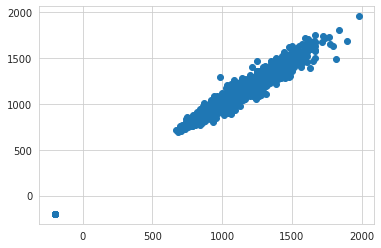

In [ ]:
plt.scatter(ytest, predict)
plt.show()

In [ ]:
print("metrics.mean_absolute_error : ", metrics.mean_absolute_error(ytest, predict))
print("metrics.mean_squared_error : ", metrics.mean_squared_error(ytest, predict))
print("np.sqrt(metrics.mean_squared_error : ", np.sqrt(metrics.mean_squared_error(ytest, predict)))
print("metrics.r2_score : ", metrics.r2_score(ytest, predict))

# Rquadrado de 97% apresentando um bom ajuste

metrics.mean_absolute_error :  36.33967414529914
metrics.mean_squared_error :  2616.0611843482907
np.sqrt(metrics.mean_squared_error :  51.14744553101641
metrics.r2_score :  0.9763228135112192


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
model = LogisticRegression()

In [ ]:
x = df_new_frame.drop(["PT08.S1(CO)","T","C6H6(GT)","RH", "AH"], axis = 1)
y = df_new_frame["PT08.S1(CO)"]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict = model.predict(xtest)

In [ ]:
print("\nmetrics.confusion_matrix : \n", metrics.confusion_matrix(ytest, predict))
print("\nmetrics.classification_report : \n", metrics.classification_report(ytest, predict))


metrics.confusion_matrix : 
 [[72  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

metrics.classification_report : 
               precision    recall  f1-score   support

        -200       1.00      1.00      1.00        72
         649       0.00      0.00      0.00         1
         655       0.00      0.00      0.00         1
         667       0.00      0.00      0.00         1
         689       0.00      0.00      0.00         0
         698       0.00      0.00      0.00         0
         704       0.00      0.00      0.00         1
         705       0.00      0.00      0.00         1
         709       0.00      0.00      0.00         0
         711       0.00      0.00      0.00         1
         713       0.00      0.00      0.00         1
         715       0.00      0.00      0.00         1
         716       0.00      0.00      0.00         1
         722       0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
model = DecisionTreeRegressor()

In [ ]:
model.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
predict = model.predict(xtest)

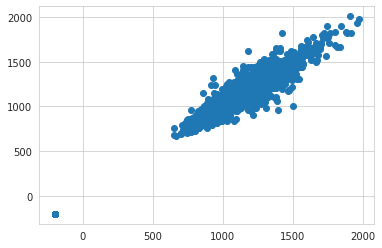

In [ ]:
plt.scatter(ytest, predict)
plt.show()

In [ ]:
print("metrics.mean_absolute_error : ", metrics.mean_absolute_error(ytest, predict))
print("metrics.mean_squared_error : ", metrics.mean_squared_error(ytest, predict))
print("np.sqrt(metrics.mean_squared_error : ", np.sqrt(metrics.mean_squared_error(ytest, predict)))
print("metrics.r2_score : ", metrics.r2_score(ytest, predict))

# Rquadrado de 95% apresentando um bom ajuste

metrics.mean_absolute_error :  55.9150641025641
metrics.mean_squared_error :  6618.955662393162
np.sqrt(metrics.mean_squared_error :  81.3569644369378
metrics.r2_score :  0.939013416597096


In [ ]:
#investigando a sazonalidade do conjunto de dados 
import pandas as pd
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('qualidade_do_ar.csv')
df.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
3,10/03/2004,21.00.00,1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
4,10/03/2004,22.00.00,1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"


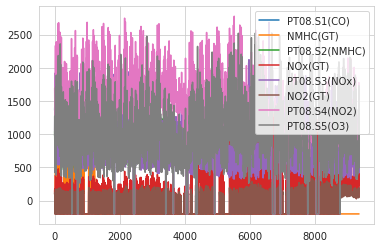

In [ ]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [ ]:
df.columns

Index(['Date', 'Time', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
data_to_use = df.filter(['Date','PT08.S1(CO)']) #investigandocomo a data influencia na predição da variáveis PT08.S1(CO)

In [ ]:
data_to_use

,Date,PT08.S1(CO)
0,10/03/2004,1360
1,10/03/2004,1292
2,10/03/2004,1402
3,10/03/2004,1376
4,10/03/2004,1272
...,...,...
9352,04/04/2005,1314
9353,04/04/2005,1163
9354,04/04/2005,1142
9355,04/04/2005,1003


In [ ]:
#mudando dia e hora 

In [ ]:

data_to_use.columns = ['ds','y']


In [ ]:
data_to_use['ds'] = pd.to_datetime(data_to_use['ds'])

In [ ]:
data_to_use.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
model = Prophet()

In [ ]:
model.fit(data_to_use)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
data_to_use=data_to_use.sort_values('ds',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')

In [ ]:
#Criando datas futuras de 365 dias 
future_dates = model.make_future_dataframe(periods=35)

In [ ]:
future_dates.tail()

,ds
421,2006-01-03
422,2006-01-04
423,2006-01-05
424,2006-01-06
425,2006-01-07


In [ ]:
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-04,1173.965593,704.290796,1524.797318,1173.965593,1173.965593,-52.632449,-52.632449,-52.632449,-52.632449,-52.632449,-52.632449,0.0,0.0,0.0,1121.333144
1,2004-01-05,1173.922978,744.584499,1586.711571,1173.922978,1173.922978,4.446115,4.446115,4.446115,4.446115,4.446115,4.446115,0.0,0.0,0.0,1178.369093
2,2004-01-06,1173.880363,786.321919,1600.505694,1173.880363,1173.880363,15.152741,15.152741,15.152741,15.152741,15.152741,15.152741,0.0,0.0,0.0,1189.033104
3,2004-01-07,1173.837748,766.608908,1613.583010,1173.837748,1173.837748,9.117864,9.117864,9.117864,9.117864,9.117864,9.117864,0.0,0.0,0.0,1182.955611
4,2004-01-08,1173.795132,774.564583,1599.344905,1173.795132,1173.795132,28.969914,28.969914,28.969914,28.969914,28.969914,28.969914,0.0,0.0,0.0,1202.765046


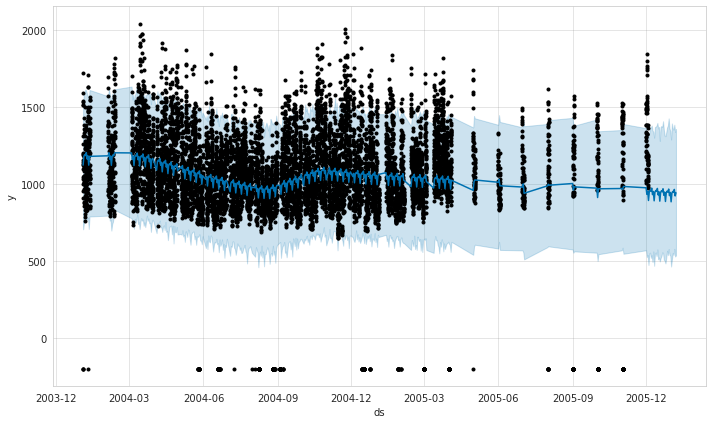

In [ ]:
model.plot(prediction)
plt.show()

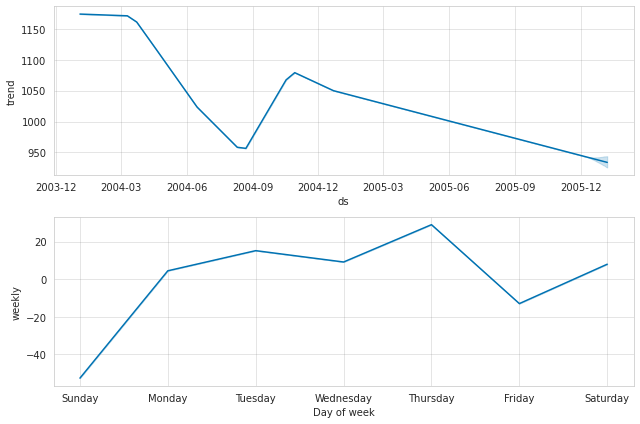

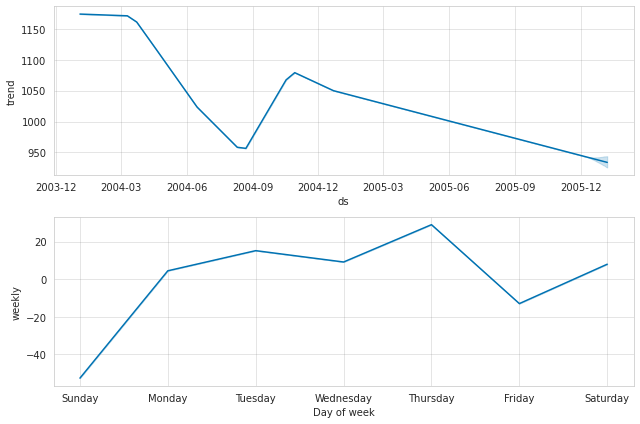

In [ ]:
model.plot_components(prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='30 days', period='18 days', horizon = '65 days')
df_cv.head()

INFO:fbprophet:Making 34 forecasts with cutoffs between 2004-02-13 00:00:00 and 2005-09-29 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2004-03-04,1146.81872,836.909008,1411.115676,1141,2004-02-13
1,2004-03-04,1146.81872,839.700238,1442.708698,1469,2004-02-13
2,2004-03-04,1146.81872,818.570953,1458.304410,1268,2004-02-13
3,2004-03-04,1146.81872,830.291049,1481.266559,1459,2004-02-13
4,2004-03-04,1146.81872,834.952512,1445.382389,1697,2004-02-13


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,112522.869481,335.444287,228.512880,0.417763,0.154640,0.807657
1,8 days,103009.929004,320.951599,225.614681,0.367384,0.158455,0.798887
2,9 days,106309.048113,326.050683,229.860558,0.367683,0.159963,0.787672
3,10 days,97533.237268,312.303118,224.952722,0.325596,0.162029,0.785020
4,11 days,93520.973238,305.811990,223.952826,0.306622,0.162220,0.788239


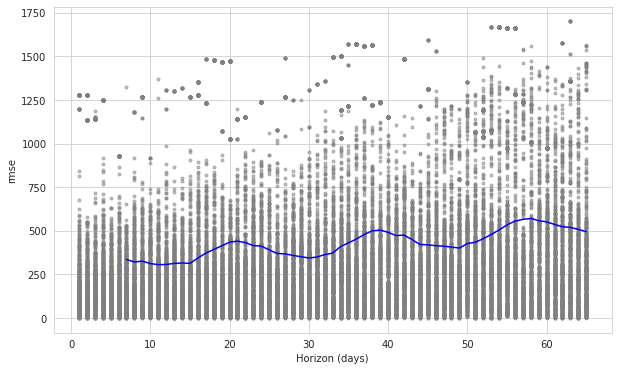

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,112522.869481,335.444287,228.512880,0.417763,0.154640,0.807657
1,8 days,103009.929004,320.951599,225.614681,0.367384,0.158455,0.798887
2,9 days,106309.048113,326.050683,229.860558,0.367683,0.159963,0.787672
3,10 days,97533.237268,312.303118,224.952722,0.325596,0.162029,0.785020
4,11 days,93520.973238,305.811990,223.952826,0.306622,0.162220,0.788239
5,12 days,94272.817957,307.038789,223.336973,0.298809,0.161979,0.794466
6,13 days,97988.658941,313.031402,226.078138,0.304668,0.161534,0.791344
7,14 days,99416.169896,315.303298,227.039595,0.309046,0.164073,0.795688
8,15 days,98084.050693,313.183733,226.518014,0.300581,0.167746,0.800145
9,16 days,117986.363219,343.491431,242.265336,0.362696,0.170995,0.786482


#Análise dos Resultados 
###Existem linhas que não fornecem informações. São valores irrelevantes (200) para quase todas as variáveis. Pode ser ser considerado como outlier e retirado do dado. 

###Nós tivemos uma alta correlação usando algoritmos : regressão linear, decision tree e random forest Foi usado o sensor PT.S8.(C0) como variável a ser predita a partir das demais variáveis excetuando Date e Time.
###92% para regressão linear (r2_score)
###97% para random forest (r2_score) 
###95% para decision tree (r2_score)

### Usando o modelo de regressão linear, regressão ridge e ElasticNet sem a retirada de Date e Time vemos uma precisão menor que os modelos anteriores:

### 89% para  a regressão Lasso 92% (r2_score) 
### 83 % para elastic Net (r2_score)
### 83 % para regressão linear (r2_score) 


### Foi usada a regressão logística porém foi obtido uma precisão muito baixa. Portanto, foi abondonada a ideia de tratar o modelo de dados com o modelo de classificação

### As variáveis mais mais relacionadas a variável de predição são PT08.S5(O3),PT08.S2(NMHC)e PT08.S3(NOx) e PT08.S4(N02) e PT08.S5(03) 

### O pico de maior emissão de gases poluentes foi de 8 a 10 da manhã e 17 às 20 horas possivelmente associado a poluição devido a maior circulação de veículos. (linhas 178 a 180)

###  Utilizando a biblioteca fbphophet foi possível ver mais claramente o pico da emissão de monoxido de carbono às quartas feiras 

### O gráfico de monóxido de carbono PT.08.S1(CO) ao longo ano nos permite ver que há um crescimento no início do ano da emissão dos poluentes que volta a crescer por volta de outubro a dezembro. (linhas 178 a 180)

##Existe uma tendência nos dados devido a sazonalidade e podemos ver seu impacto na predição para o o ano consecutivo ao dado histórico onde é possível visualizar um impacto na predição com o uso da biblioteca fbprophet

